# Import Libary

*Script* di bawah ini bertujuan untuk melakukan *import* atau memanggil *library* untuk membantu analisis, terdiri atas *data manipulation*, *data visualization*, *modeling*, dan *loading data* eksternal dari *kaggle*.

In [ ]:
# Installing some library
!pip install scikit-learn scipy tabulate

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import os
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling (Machine Learning)
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
from tabulate import tabulate
#Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Loading data
import kagglehub
#ignored warining
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

*Loading dataset* merupakan proses meng*import* dan membaca *dataset*. *dataset* bisa berasal dari internal tersimpan dari dalam perangkat maupun *external* dari link penyedia data luring seperi *kaggle*.

In [ ]:
# Import datasetfrom kaggle
dataset_name = "nadyinky/sephora-products-and-skincare-reviews"
location = kagglehub.dataset_download(dataset_name)
files = os.listdir(location)
print(files)

['product_info.csv', 'reviews_500-750.csv', 'reviews_750-1250.csv', 'reviews_1250-end.csv', 'reviews_250-500.csv', 'reviews_0-250.csv']


In [ ]:
# Loading product csv
csv_file_product = os.path.join(location, "product_info.csv")
product_df = pd.read_csv(csv_file_product)
product_df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
# Loading reviews csv
csv_file_reviews = os.path.join(location, "reviews_1250-end.csv")
reviews_df = pd.read_csv(csv_file_reviews)
reviews_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


# Data Undestanding

Bagian data understanding berfungsi sebagai bagian untuk mengetahui dimensi dataset, tipe data dari setiap fitur, informasi tentang missing value dan data terduplikasi, serta pemilihan fitur yang relevan.

### Product Dataset

In [ ]:
# Product Dataset Dimension
product_df.shape

(8494, 27)

In [ ]:
# Product Dataset Data Type Information
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [ ]:
# Checking for missing value
(product_df.isnull() | product_df.isna() | (product_df == "")).sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [ ]:
# Checking for duplicated value
product_df.duplicated().sum()

0

In [ ]:
# Showing uniqe value each features
product_df.nunique()

product_id            8494
product_name          8415
brand_id               304
brand_name             304
loves_count           7436
rating                4394
reviews               1556
size                  2055
variation_type           7
variation_value       2729
variation_desc         935
ingredients           6538
price_usd              298
value_price_usd        174
sale_price_usd          88
limited_edition          2
new                      2
online_only              2
out_of_stock             2
sephora_exclusive        2
highlights            4417
primary_category         9
secondary_category      41
tertiary_category      118
child_count             55
child_max_price        222
child_min_price        208
dtype: int64

### Reviews Dataset

In [ ]:
# Reviews Dataset Dimension
reviews_df.shape

(49977, 19)

In [ ]:
# Reviews Dataset Data Type Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               36522 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49918 non-null  object 
 10  review_title              35599 non-null  object 
 11  skin_tone                 42776 non-null  object 
 12  eye_color                 43717 non-null  object 
 13  skin_type                 46346 non-null  object 
 14  hair_c

In [ ]:
# Checking for missing value
(reviews_df.isnull() |reviews_df.isna() | (reviews_df == "")).sum()

Unnamed: 0                      0
author_id                       0
rating                          0
is_recommended               3817
helpfulness                 13455
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
review_text                    59
review_title                14378
skin_tone                    7201
eye_color                    6260
skin_type                    3631
hair_color                   8851
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64

In [ ]:
# Checking for duplicated date
reviews_df.duplicated().sum()

0

In [ ]:
# Showing uniqe value each features
reviews_df.nunique()

Unnamed: 0                  49977
author_id                   41457
rating                          5
is_recommended                  2
helpfulness                  1209
total_feedback_count          255
total_neg_feedback_count      124
total_pos_feedback_count      212
submission_time              3490
review_text                 49395
review_title                26029
skin_tone                      14
eye_color                       6
skin_type                       4
hair_color                      7
product_id                   1104
product_name                 1097
brand_name                    122
price_usd                     183
dtype: int64

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah proses untuk memahami karakteristik, pola, dan struktur data sebelum melakukan analisis lebih lanjut. EDA membantu mengungkap hubungan antar variabel, baik secara statistik maupun visual, guna memberikan wawasan awal untuk membangun model prediktif. Teknik yang umum digunakan meliputi visualisasi, ringkasan statistik, dan korelasi antar variabel.

### Product Dataset

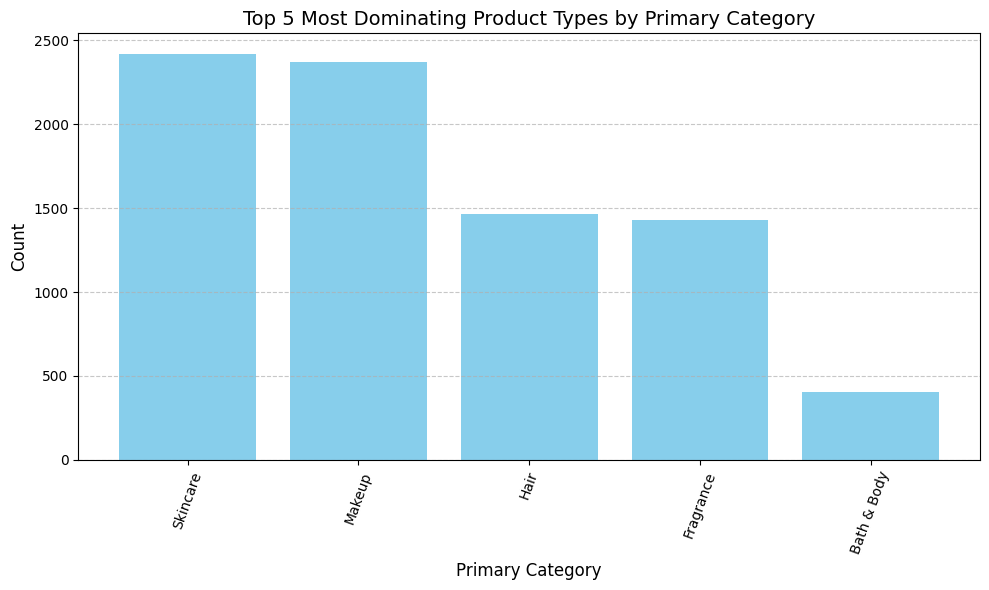

In [ ]:
# Top 5 Most Dominating Product Type
primary_category_counts = product_df['primary_category'].value_counts().head(5)
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.bar(primary_category_counts.index, primary_category_counts.values, color='skyblue')
axs.set_xlabel('Primary Category', fontsize=12)
axs.set_ylabel('Count', fontsize=12)
axs.set_title('Top 5 Most Dominating Product Types by Primary Category', fontsize=14)
axs.tick_params(axis='x', rotation=70)
axs.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

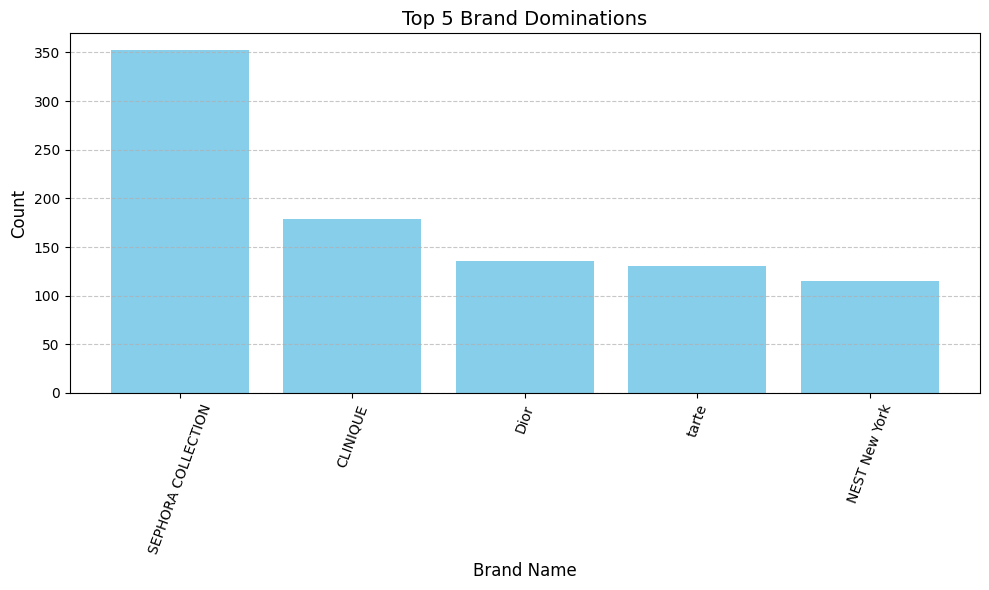

In [ ]:
# Top 5 Brand Dominations
brand_counts = product_df['brand_name'].value_counts().head(5)
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.bar(brand_counts.index, brand_counts.values, color='skyblue')
axs.set_xlabel('Brand Name', fontsize=12)
axs.set_ylabel('Count', fontsize=12)
axs.set_title('Top 5 Brand Dominations', fontsize=14)
axs.tick_params(axis='x', rotation=70)
axs.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

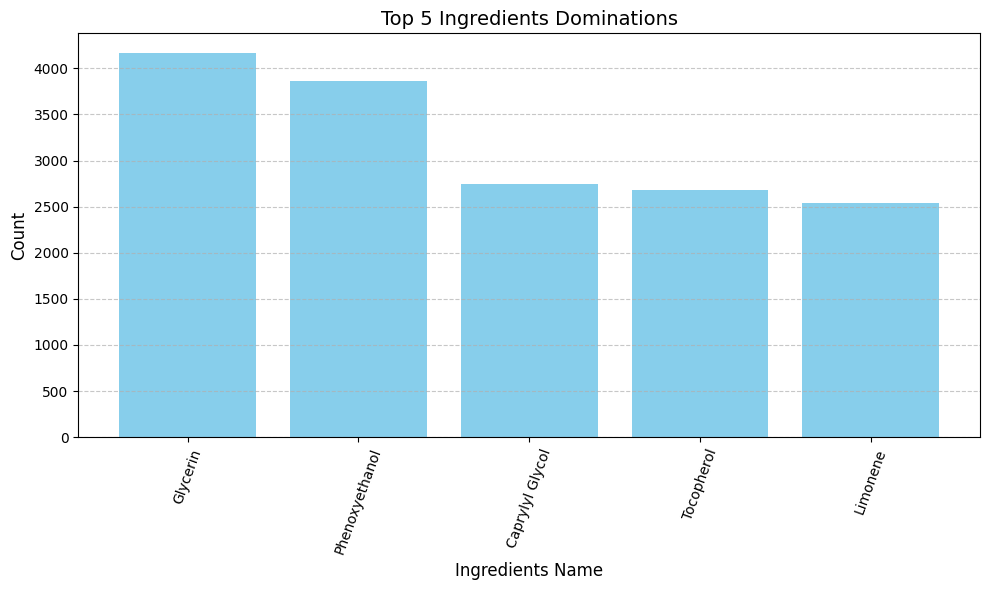

In [ ]:
# Top 5 Ingredients Dominations
ingredients_counts = product_df['ingredients'].str.strip('[]').str.replace("'", "").str.split(', ').explode().value_counts().head(5)
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.bar(ingredients_counts.index, ingredients_counts.values, color='skyblue')
axs.set_xlabel('Ingredients Name', fontsize=12)
axs.set_ylabel('Count', fontsize=12)
axs.set_title('Top 5 Ingredients Dominations', fontsize=14)
axs.tick_params(axis='x', rotation=70)
axs.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Berdasarkan EDA yang telah dilakukan pada dataset product, diperoleh bila:
- jenis produk primer yang paling banyak dijual pada situs sephora adalah skincare, Makeup, Fregrance, Hair, bath & body mist.
- brand yang paling banyak dijual adalah shepora collection, clinique, dior, kèrastase, dan tarte.
- ingredients yang paling banyak dikandung oleh produk yang di jual pada toko ini adalah glycerin, phenoxythanol, caprylyl glycol, limonene, dan tocophenol.

### Reviews Dataset

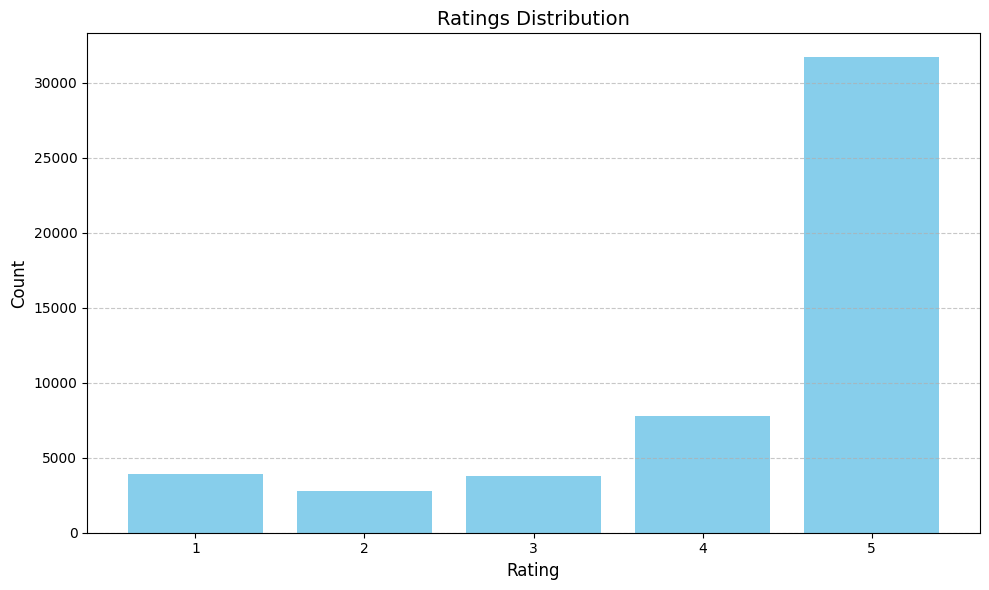

In [ ]:
# Ratings Distribution
rating_counts = reviews_df['rating'].value_counts().sort_index()
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
axs.bar(rating_counts.index, rating_counts.values, color='skyblue')
axs.set_xlabel('Rating', fontsize=12)
axs.set_ylabel('Count', fontsize=12)
axs.set_title('Ratings Distribution', fontsize=14)
axs.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

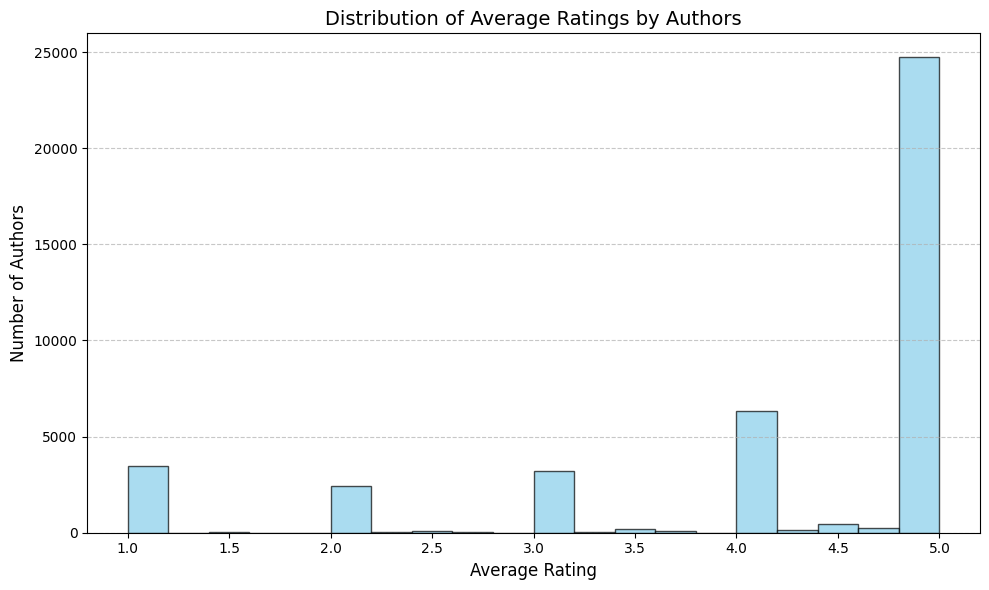

In [ ]:
# Distribution of Average Ratings by Authors
average_rating_per_author = reviews_df.groupby('author_id')['rating'].mean().reset_index()
average_rating_per_author.rename(columns={'rating': 'average_rating'}, inplace=True)
plt.figure(figsize=(10, 6))
plt.hist(average_rating_per_author['average_rating'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Ratings by Authors', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Authors', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

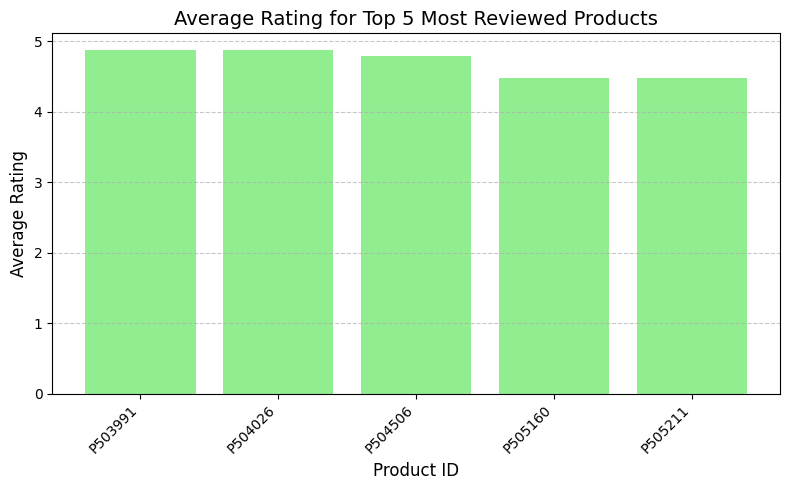

In [ ]:
# Average Rating for Top 5 Most Reviewed Products
most_reviewed_products = reviews_df['product_id'].value_counts().head(5)
top_products_df = reviews_df[reviews_df['product_id'].isin(most_reviewed_products.index)]
average_rating_top_products = top_products_df.groupby('product_id')['rating'].mean()
plt.figure(figsize=(8, 5))
plt.bar(average_rating_top_products.index, average_rating_top_products.values, color='lightgreen')
plt.title('Average Rating for Top 5 Most Reviewed Products', fontsize=14)
plt.xlabel('Product ID', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Berdasarkan EDA yang sudah dilakukan pada dataset reviews,
- rating 5 adalah rating yang paling sering diberikan oleh author pada saat memberikan penilaian produk, jarang sekali author memberikan rating 2 pada penilaian produknya.
- lima produk dengan jumlah ulasan terbanyak semuanya memiliki rata-rata penilaian yang tinggi, yaitu di atas 4,5.

# Data Preparation

### Product Dataset (Content-Based Filtering)

In [ ]:
# Using selection feature for product dataset
product_df = product_df[['product_id','product_name','brand_name','ingredients','primary_category','tertiary_category']]

Informasi awal dataset untuk product memiliki dimensi (8494,27) yang artinya 8494 baris dengan 27 kolom (fitur). Dataset product ini berisikan produk yang dijual pada situs sephora, kandungan produk, jenis produk, dan lain sebagainya. Dari 27 fitur, dipilih 5 fitur yang relevan, antara lain

```
'product_id','product_name','brand_name','ingredients','primary_category','tertiary_category'
```
Fitur-fitur ini dipilih dengan alasan yang mendukung analisis produk skincare secara komprehensif.
- **Product_ID** digunakan sebagai nilai unik untuk membedakan setiap produk secara individual.
- **product_name** mencirikan nama produk,
- **brand_name** mencirikan brand yang memproduksi skincare.
- **Ingredients** berperan penting dalam menelusuri kandungan skincare untuk memastikan kecocokan dengan kebutuhan spesifik pengguna, seperti kulit sensitif atau berjerawat.
- **Primary_Category** mencerminkan karakteristik utama produk, misalnya sebagai pewangi atau lotion, sedangkan
- **Tertiary_Category** memberikan informasi tambahan yang lebih spesifik untuk melengkapi kategori utama dan memberikan pemahaman yang lebih rinci tentang produk. Dataframe product ini digunakan untuk sistem rekomendasi **content-based filtering**



In [ ]:
# Checking for duplicate value
product_df.duplicated().sum()

0

In [ ]:
# Checking for missing value
(product_df.isnull() | product_df.isna() | (product_df == "")).sum()

product_id             0
product_name           0
brand_name             0
ingredients          945
primary_category       0
tertiary_category    990
dtype: int64

In [ ]:
# Droping missing value
product_df.dropna(inplace=True)

In [ ]:
# Product df shape
product_df.shape

(6642, 6)

In [ ]:
# Product_df unique
product_df.nunique()

product_id           6642
product_name         6592
brand_name            278
ingredients          5962
primary_category        7
tertiary_category     106
dtype: int64

Setelah dilakukan pemilihan dilanjutkan dengan pemeriksaan nilai yang duplikat serta nilai yang hilang. Terdapat beberapa nilai yang hilang dari dataset, sehingga diputuskan untuk melakukan drop pada row. Setelah dilakukan pembersian tersisa 6642 baris dengan **product_name** sebanyak 6592, **ingredient** sebanyak 5962, 7 **primary_category**, **brand_name** sebanyak 278 dan 106 **tertiary_category** yang  masing- masing bernilai unik.

In [ ]:
# Vectorizer
vectorizer = TfidfVectorizer()

In [ ]:
# Making vector word for each feature
ingredient_vector = vectorizer.fit_transform(product_df['ingredients'])
prim_category_vector = vectorizer.fit_transform(product_df['primary_category'])
tert_category_vector = vectorizer.fit_transform(product_df['tertiary_category'])

In [ ]:
# Combining all features that have been vectorized
combined_features = hstack([ingredient_vector, prim_category_vector, tert_category_vector])

Langkah- langkah yang dilakukan pada data preparation untuk product dataset adalah sebagai berikut:
- Inisialisasi Vectorizer:
Membuat objek TfidfVectorizer() yang akan digunakan untuk mengubah data teks menjadi representasi numerik (vektor).

- Membuat Vektor untuk Setiap Fitur:
Mengubah kolom **ingredients**, **primary_category**, dan **tertiary_category** pada dataframe menjadi vektor TF-IDF secara terpisah menggunakan fit_transform.

- Menggabungkan Semua Fitur yang Sudah Divectorisasi:
Menggabungkan ketiga vektor hasil transformasi tersebut menjadi satu matriks fitur menggunakan fungsi hstack.

### Reviews Dataset (Collaborative Filtering)

In [ ]:
# Using selection feature for reviews dataset
reviews_df = reviews_df[['author_id','product_id','rating']]

In [ ]:
# Checking for missing value
(reviews_df.isnull() |reviews_df.isna() | (reviews_df == "")).sum()

author_id     0
product_id    0
rating        0
dtype: int64

In [ ]:
# Checking for duplicated data
reviews_df.duplicated().sum()

33

In [ ]:
# Droping duplicated data
reviews_df.drop_duplicates(inplace=True)

In [ ]:
# reviews shape
reviews_df.shape

(49944, 3)

In [ ]:
#reviews uniqe character
reviews_df.nunique()

author_id     41457
product_id     1104
rating            5
dtype: int64

informasi awal dataset reviews berdimensi (49977,19) yang berari 49977 baris dengan 19 fitur. Dataset ini berisikan rating, ulasan produk dari author terhadap produk yang telah digunakan. Dari 19 fitur yang ada, dipilih 3 fitur antara lain sebagai berikut.

```
'author_id','product_id','rating'
```
3 fitur ini dipilih dikarenakan **author_id** mencirikan pengguna yang memberikan rating dan ulasan terhadapa produk yang digunakakan. **product_id** merepresentasikan nama produk yang dinilia serta, **rating** mencerminkan penilaian yang diberikan oleh author terhadap produk tersebut. 3 Fitur yang dipilih ini akan digunakan pada sistem rekomendasi **collaborative-filering**.


Setelah dilakukan pemilihan, dilakukan pengecheckan missing value, dan nilai yang terduplikasi. Ditemukan 0 missing value dan 33 data terdupliasi selanjutkan dilakukan drop pada nilai yang terduplikasi. Setelah dilakukan pembersihan tersisah 41457 row dengan karakter unik untuk product_id yang diulas sebanyak 1104 dan terdapat 5 tingkatan rating yang diberikan.

In [ ]:
# 1. Spliting data into train and test (before encoding)
train_df, test_df = train_test_split(reviews_df, test_size=0.2, random_state=42)

# 2. Encode user_id and product_id only based on the training data categories
user_cat = pd.Categorical(train_df['author_id'])
product_cat = pd.Categorical(train_df['product_id'])

train_user_ids = user_cat.codes
train_product_ids = product_cat.codes
train_ratings = train_df['rating'].values

# 3. Build a mapping from user_id/product_id to encoded index for later use in predictions
user_id_to_idx = dict(zip(user_cat.categories, range(len(user_cat.categories))))
product_id_to_idx = dict(zip(product_cat.categories, range(len(product_cat.categories))))

# 4. Create user-item rating matrix from training data
num_users = len(user_cat.categories)
num_products = len(product_cat.categories)
rating_matrix = np.zeros((num_users, num_products))

for u, p, r in zip(train_user_ids, train_product_ids, train_ratings):
    rating_matrix[u, p] = r

# Now rating_matrix contains training ratings only

# 5. For testing, encode test users/products using training encoders
def encode_user_product_ids(df, user_mapping, product_mapping):
    encoded_users = df['author_id'].map(user_mapping)
    encoded_products = df['product_id'].map(product_mapping)
    # Drop rows with unknown users/products (cold start)
    mask = encoded_users.notna() & encoded_products.notna()
    return encoded_users[mask].astype(int), encoded_products[mask].astype(int), df.loc[mask, 'rating']

test_user_ids, test_product_ids, test_ratings = encode_user_product_ids(test_df, user_id_to_idx, product_id_to_idx)


Langkah-langkah yang dilakukan pada proses ini untuk dataset revies adalah:

- Definisi Dataset:
  - Membuat variabel X yang terdiri dari kolom author_id dan product_id dari DataFrame reviews_df. Variabel ini mewakili fitur input untuk model.
  - Membuat variabel y yang merupakan kolom rating dari DataFrame yang sama. Variabel ini menjadi target output.
- encoding user dan product menjadi numeric
- membuat vektor yang berisikan user, item, dan rating
- spliting data training testing (80:20)

# Modeling

### Content-Based Learning

In [ ]:
# Counting Similarity Matrix
cosine_sim_matrix = cosine_similarity(combined_features)

In [ ]:
cosine_sim_matrix

array([[1.        , 0.75353382, 0.76443952, ..., 0.80221979, 0.6782589 ,
        0.00949455],
       [0.75353382, 1.        , 0.91825784, ..., 0.60787055, 0.44235932,
        0.00506409],
       [0.76443952, 0.91825784, 1.        , ..., 0.6002254 , 0.43155888,
        0.0058402 ],
       ...,
       [0.80221979, 0.60787055, 0.6002254 , ..., 1.        , 0.67522905,
        0.04319711],
       [0.6782589 , 0.44235932, 0.43155888, ..., 0.67522905, 1.        ,
        0.03056578],
       [0.00949455, 0.00506409, 0.0058402 , ..., 0.04319711, 0.03056578,
        1.        ]])

In [ ]:
# Save cosine similarity matrix as dataframe
similarity_df = pd.DataFrame(cosine_sim_matrix, index=product_df['product_id'], columns=product_df['product_id'])

In [ ]:
# Cosine similarity dimension
similarity_df.shape

(6642, 6642)

In [ ]:
# Reseting indices in product dataset
product_df = product_df.reset_index(drop=True)

In [ ]:
# Getting Recomendation function
def generate_recommendations(item_id, num_recommendations=5):
    idx = product_df.index[product_df['product_id'] == item_id].tolist()[0]
    similarity_scores = cosine_sim_matrix[idx]
    sorted_indices = similarity_scores.argsort()[::-1]
    filtered_indices = [i for i in sorted_indices if i != idx][:num_recommendations]
    recommended_items = product_df.loc[filtered_indices, ['product_name', 'brand_name', 'primary_category', 'tertiary_category']].copy()
    recommended_items.insert(0, 'ranking', range(1, num_recommendations + 1))
    product_name = product_df.loc[product_df['product_id'] == item_id, 'product_name'].values[0]

    print(f"Recommendations for: {product_name}\n")
    print(tabulate(recommended_items, headers='keys', tablefmt='psql', showindex=False))

    return {
        'product_name': product_name,
        'recommendations': recommended_items
    }

In [ ]:
def print_recommendations(rec_dict):
    print(f"Recommendations for: {rec_dict['product_name']}\n")
    print(tabulate(rec_dict['recommendations'], headers='keys', tablefmt='psql', showindex=False))

In [ ]:
result = generate_recommendations('P473671')
print_recommendations(result)

Recommendations for: Fragrance Discovery Set

+-----------+---------------------------------------+--------------------+--------------------+---------------------+
|   ranking | product_name                          | brand_name         | primary_category   | tertiary_category   |
|-----------+---------------------------------------+--------------------+--------------------+---------------------|
|         1 | Wild Poppy Perfume Set                | NEST New York      | Fragrance          | Perfume Gift Sets   |
|         2 | Sunkissed Hibiscus Fine Fragrance Set | NEST New York      | Fragrance          | Perfume Gift Sets   |
|         3 | Not a Perfume Sampler Set             | Juliette Has a Gun | Fragrance          | Perfume Gift Sets   |
|         4 | Essential Wardrobe Eau de Parfum Set  | Juliette Has a Gun | Fragrance          | Perfume Gift Sets   |
|         5 | Mini Fragrance Discovery Set          | HERMÈS             | Fragrance          | Perfume Gift Sets   |
+---------

### Collaborative Filtering

In [ ]:
# Transpose rating matrix to get item vectors in rows
item_matrix = rating_matrix.T

In [ ]:
# Compute cosine similarity between items
item_similarity = cosine_similarity(item_matrix)
print("Item similarity matrix shape:", item_similarity.shape)

Item similarity matrix shape: (1098, 1098)


In [ ]:
def recommend_products_with_cosine_and_similar_users(user_id, review_data, product_data, n=5, m=5):
    if user_id not in review_data['author_id'].values:
        print(f"User {user_id} not found in the review data.")
        return

    # Create user-product rating matrix (pivot)
    user_product_matrix = review_data.pivot_table(index='author_id', columns='product_id', values='rating').fillna(0)

    # Compute cosine similarity matrices for items and users
    item_similarity_matrix = cosine_similarity(user_product_matrix.T)
    item_similarity_df = pd.DataFrame(item_similarity_matrix, index=user_product_matrix.columns, columns=user_product_matrix.columns)

    user_similarity_matrix = cosine_similarity(user_product_matrix)
    user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_product_matrix.index, columns=user_product_matrix.index)

    # Get products rated by the user
    user_ratings = review_data[review_data['author_id'] == user_id]
    rated_products = user_ratings['product_id'].tolist()

    all_products = user_product_matrix.columns.tolist()
    unrated_products = [p for p in all_products if p not in rated_products]

    # Calculate item-based recommendation scores
    scores = {}
    for rated_product in rated_products:
        if rated_product not in item_similarity_df.index:
            continue
        rated_product_rating = user_ratings[user_ratings['product_id'] == rated_product]['rating'].values[0]
        for unrated_product in unrated_products:
            if unrated_product not in item_similarity_df.columns:
                continue
            similarity_score = item_similarity_df.loc[rated_product, unrated_product]
            scores[unrated_product] = scores.get(unrated_product, 0) + similarity_score * rated_product_rating

    recommended_products = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:n]

    # Calculate user-based recommendations from similar users
    if user_id not in user_similarity_df.index:
        print(f"User {user_id} not found in the user similarity matrix.")
        similar_user_recommendations = []
    else:
        similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).drop(user_id).head(m).index.tolist()
        similar_user_scores = {}
        for sim_user in similar_users:
            sim_user_ratings = review_data[review_data['author_id'] == sim_user]
            for _, row in sim_user_ratings.iterrows():
                product = row['product_id']
                rating = row['rating']
                if product not in rated_products and rating >= 4:
                    similar_user_scores[product] = max(similar_user_scores.get(product, 0), rating)
        similar_user_recommendations = sorted(similar_user_scores.items(), key=lambda x: x[1], reverse=True)[:m]

    # Print item-based recommendations
    print(f"\nTop-{n} Item-based Recommendations for User {user_id}:\n")
    recommendations = []
    for rank, (product_id, score) in enumerate(recommended_products, start=1):
        product_info = product_data[product_data['product_id'] == product_id]
        if product_info.empty:
            continue
        product_name = product_info.iloc[0]['product_name']
        category = product_info.iloc[0]['primary_category']
        recommendations.append([rank, product_id, product_name, category, score])
    print(tabulate(recommendations, headers=["Rank", "Product ID", "Product Name", "Category", "Score"], tablefmt="psql"))

    # Print user-based recommendations
    print(f"\nTop-{m} User-based Recommendations from Similar Users for User {user_id}:\n")
    user_based_recs = []
    for rank, (product_id, rating) in enumerate(similar_user_recommendations, start=1):
        product_info = product_data[product_data['product_id'] == product_id]
        if product_info.empty:
            continue
        product_name = product_info.iloc[0]['product_name']
        category = product_info.iloc[0]['primary_category']
        user_based_recs.append([rank, product_id, product_name, category, rating])
    print(tabulate(user_based_recs, headers=["Rank", "Product ID", "Product Name", "Category", "Rating"], tablefmt="psql"))

In [ ]:
recommend_products_with_cosine_and_similar_users('1845533064',reviews_df,product_df)


Top-5 Item-based Recommendations for User 1845533064:

+--------+--------------+--------------------------------------------------+------------+---------+
|   Rank | Product ID   | Product Name                                     | Category   |   Score |
|--------+--------------+--------------------------------------------------+------------+---------|
|      1 | P504637      | Equilibrium Resurfacing Retinoid Treatment       | Skincare   | 2.06313 |
|      3 | P502200      | HydraKate Recharging Serum with Hyaluronic Acid  | Skincare   | 1.48869 |
|      4 | P483700      | Smoothing Vitamin C Eye + Expression Lines Cream | Skincare   | 1.4814  |
|      5 | P481086      | Liftwear Brightening Vitamin C Gel-Cream         | Skincare   | 1.4412  |
+--------+--------------+--------------------------------------------------+------------+---------+

Top-5 User-based Recommendations from Similar Users for User 1845533064:

+--------+--------------+--------------------------------------------

# Evaluation

### Content-Based Filtering


In [ ]:
def evaluate_product_recommendation(item_id, relevant_product_ids, product_df, cosine_sim_matrix, top_n=5):
    """
    Evaluate product recommendations using Precision@K.

    Parameters:
    - item_id: The ID of the target product to evaluate.
    - relevant_product_ids: A list of relevant product IDs (e.g., products in the same category).
    - product_df: DataFrame containing product information.
    - cosine_sim_matrix: Cosine similarity matrix between products.
    - top_n: Number of recommendations to evaluate.

    Returns:
    - A dictionary containing precision and additional evaluation details.
    """
    # Get the top-N recommendations for the target product
    recs = generate_recommendations(item_id, num_recommendations=top_n)
    recommended_df = recs['recommendations']

    # Extract product IDs from recommendations
    recommended_product_ids = recommended_df.index.to_list()
    recommended_product_ids = product_df.loc[recommended_product_ids, 'product_id'].tolist()

    # Calculate the intersection of recommended and relevant products
    hits = set(recommended_product_ids).intersection(set(relevant_product_ids))

    # Calculate Precision@K
    precision = len(hits) / top_n if top_n > 0 else 0

    print(f"Evaluation for Product ID: {item_id}")
    print(f"Precision@{top_n}: {precision:.4f}")
    print(f"Relevant Products: {relevant_product_ids}")
    print(f"Recommended Products: {recommended_product_ids}")

    return {
        'precision': precision,
        'hits': hits,
        'recommended_products': recommended_product_ids
    }


def evaluate_multiple_products(product_ids, product_df, cosine_sim_matrix, top_n=5):
    """
    Evaluate recommendations for multiple products and compute average Precision@K.

    Parameters:
    - product_ids: List of product IDs to evaluate.
    - product_df: DataFrame containing product information.
    - cosine_sim_matrix: Cosine similarity matrix between products.
    - top_n: Number of recommendations to evaluate for each product.

    Returns:
    - The average Precision@K for the evaluated products.
    """
    precision_scores = []

    for item_id in product_ids:
        # Define relevant products based on the primary category
        relevant_product_ids = product_df[
            product_df['primary_category'] == product_df.loc[product_df['product_id'] == item_id, 'primary_category'].values[0]
        ]['product_id'].tolist()
        relevant_product_ids = [pid for pid in relevant_product_ids if pid != item_id]  # Exclude the target item itself

        # Evaluate the product
        if relevant_product_ids:
            result = evaluate_product_recommendation(item_id, relevant_product_ids, product_df, cosine_sim_matrix, top_n=top_n)
            precision_scores.append(result['precision'])
        else:
            print(f"[SKIP] Product {item_id} does not have relevant products.")

    # Calculate the average Precision@K
    if precision_scores:
        avg_precision = np.mean(precision_scores)
        print(f"\nAverage Precision@{top_n} for {len(precision_scores)} products: {avg_precision:.4f}")
        return avg_precision
    else:
        print("No valid products for evaluation.")
        return 0


# Example Usage
sample_product_ids = product_df['product_id'].sample(5).tolist()  # Randomly sample 5 products
evaluate_multiple_products(sample_product_ids, product_df, cosine_sim_matrix, top_n=5)

Recommendations for: Crème Brûlée Soufflé Body Crème

+-----------+----------------------------------------+------------------+--------------------+--------------------------+
|   ranking | product_name                           | brand_name       | primary_category   | tertiary_category        |
|-----------+----------------------------------------+------------------+--------------------+--------------------------|
|         1 | Almond Coconut Soufflé Body Crème      | Laura Mercier    | Bath & Body        | Body Lotions & Body Oils |
|         2 | Citrine Body Cream                     | NEST New York    | Bath & Body        | Body Lotions & Body Oils |
|         3 | Shea Butter Ultra Rich Body Cream      | L'Occitane       | Bath & Body        | Body Lotions & Body Oils |
|         4 | Mini English Pear & Freesia Body Crème | Jo Malone London | Bath & Body        | Body Lotions & Body Oils |
|         5 | Moisturizing And Smoothing Milk Veil   | L'Occitane       | Bath & Body       

1.0

### Collaborative Filtering

In [ ]:
def recommendation_by_author(author_id, train_df, item_similarity, top_n=10):
    # Pivot train data to create the item-user matrix
    item_user_matrix = train_df.pivot_table(index='product_id', columns='author_id', values='rating', fill_value=0)

    # Check if the author_id exists in the matrix
    if author_id not in item_user_matrix.columns:
        print(f"[SKIP] Author {author_id} is not in the training data.")
        return pd.DataFrame(columns=['product_id', 'score'])

    # Get the ratings given by the user
    user_ratings = item_user_matrix[author_id]

    # Compute scores for all items
    scores = item_similarity.dot(user_ratings).reshape(-1)
    scores_df = pd.DataFrame({
        'product_id': item_user_matrix.index,
        'score': scores
    })

    # Exclude items the user has already rated
    rated_items = train_df[train_df['author_id'] == author_id]['product_id'].tolist()
    scores_df = scores_df[~scores_df['product_id'].isin(rated_items)]

    # Get the top-N recommendations
    recommended_df = scores_df.sort_values(by='score', ascending=False).head(top_n)

    return recommended_df

In [ ]:
def evaluate_author_recommendation(author_id, train_df, test_df, item_similarity, k=10):
    actual_items = test_df[test_df['author_id'] == author_id]['product_id'].tolist()

    if not actual_items:
        print(f"[SKIP] Author {author_id} has no test data.")
        return None

    # Generate recommendations
    recommended_df = recommendation_by_author(author_id, train_df, item_similarity, top_n=k)

    if recommended_df.empty:
        print(f"[SKIP] No recommendations for Author {author_id}.")
        return None

    recommended_items = recommended_df['product_id'].tolist()

    # Calculate precision@k
    precision = len(set(actual_items) & set(recommended_items)) / k

    print(f"Author {author_id} | Precision@{k}: {precision:.4f}")
    print(f"Actual Items:      {actual_items}")
    print(f"Recommended Items: {recommended_items}")
    return precision

In [ ]:
def evaluate_multiple_authors(author_ids, train_df, test_df, item_similarity, k=5):
    precision_scores = []

    for author_id in author_ids:
        score = evaluate_author_recommendation(author_id, train_df, test_df, item_similarity, k)
        if score is not None:
            precision_scores.append(score)

    if precision_scores:
        avg_precision = np.mean(precision_scores)
        print(f"\nAverage Precision@{k} for {len(precision_scores)} authors: {avg_precision:.4f}")
        return avg_precision
    else:
        print("No valid authors for evaluation.")
        return 0

# Example usage
sample_author_ids = test_df['author_id'].unique()[:5]
evaluate_multiple_authors(sample_author_ids, train_df, test_df, item_similarity, k=5)

[SKIP] Author 21807893077 is not in the training data.
[SKIP] No recommendations for Author 21807893077.
[SKIP] Author 5433790284 is not in the training data.
[SKIP] No recommendations for Author 5433790284.
[SKIP] Author 5609454749 is not in the training data.
[SKIP] No recommendations for Author 5609454749.
[SKIP] Author 5572535326 is not in the training data.
[SKIP] No recommendations for Author 5572535326.
[SKIP] Author 20116203974 is not in the training data.
[SKIP] No recommendations for Author 20116203974.
No valid authors for evaluation.


0